In [ ]:
!pip install textblob
!python -m textblob.download_corpora

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
!pip install googletrans==4.0.0-rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.8 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=d89c074eff9edf98bc13377b3ed379546c5111e8d4343822da83d89320b0d7c5
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans

In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from textblob import TextBlob
import pandas as pd

# Lee el archivo de Excel desde Colab
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/BienestarUniverdidad.xlsx')

# Almacena los comentarios en una lista
comentarios = df['Texto'].tolist()

Aplicar el análisis de sentimientos a cada comentario y almacenar los resultados en una nueva columna.

In [ ]:
# Crea una nueva columna para almacenar los resultados del análisis de sentimientos
df['Sentimientos'] = ''

# Aplica el análisis de sentimientos a cada comentario
for i, comentario in enumerate(comentarios):
    # Crea un objeto TextBlob para el comentario
    blob = TextBlob(comentario).translate(from_lang='es', to='en')
    
    # Obtiene la polaridad del comentario (-1 a 1, donde -1 es negativo y 1 es positivo)
    polaridad = blob.sentiment.polarity
    
    # Agrega el resultado del análisis de sentimientos a la columna 'Sentimientos'
    df.loc[i, 'Sentimientos'] = polaridad


Se guarda el archivo de Excel con los resultados del análisis de sentimientos

In [ ]:
df.to_excel('/content/drive/MyDrive/Colab Notebooks/BienestarUniverdidad.xlsx', index=False)

Definición del umbral de polaridad

In [ ]:
# Definir umbral de polaridad
umbral_polaridad = 0.15

# Asignar categorías en base al umbral de polaridad
df['Categoría'] = df['Sentimientos'].apply(lambda x: 'No deserción' if x >= 0.15 else 'Deserción' if x <= -0.15 else 'Neutro')

# Guardar el archivo de Excel con los resultados del análisis de sentimientos
df.to_excel('/content/drive/MyDrive/Colab Notebooks/BienestarUniverdidad.xlsx', index=False)



Análisis

In [ ]:
categoria_counts = df['Categoría'].value_counts()


In [ ]:
print(categoria_counts)


Neutro          51
No deserción    43
Deserción       15
Name: Categoría, dtype: int64


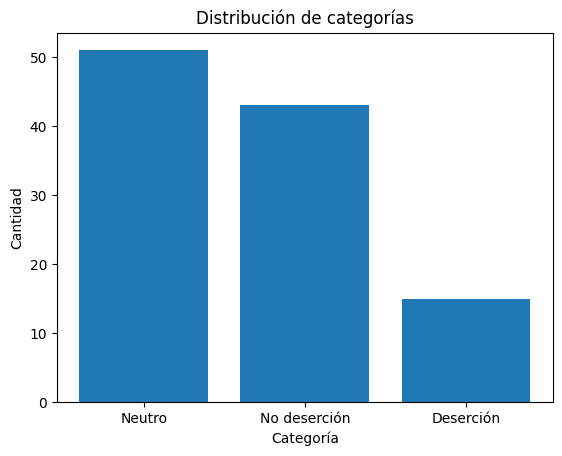

In [ ]:
import matplotlib.pyplot as plt

plt.bar(categoria_counts.index, categoria_counts.values)
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.title('Distribución de categorías')
plt.show()


Ajuste de modelo y entrenamiento

In [ ]:
from sklearn.model_selection import train_test_split

# Divide los datos en características (X) y etiquetas (y)
X = df['Texto']  # Características (comentarios)
y = df['Categoría']  # Etiquetas (categorías)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear un objeto TfidfVectorizer
vectorizer = TfidfVectorizer()

# Ajustar y transformar los datos de entrenamiento
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transformar los datos de prueba
X_test_vectorized = vectorizer.transform(X_test)

# Crear el clasificador SVM
clf = svm.SVC()

# Entrenar el modelo utilizando los datos de entrenamiento vectorizados
clf.fit(X_train_vectorized, y_train)

# Realizar predicciones utilizando los datos de prueba vectorizados
y_pred = clf.predict(X_test_vectorized)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))


Precisión del modelo: 45.45%


In [24]:
# Obtener las características de entrada de los nuevos datos
nuevos_datos = [
    "Este semestre ha sido muy difícil para mí. No estoy seguro si podré continuar.",
    "Estoy muy contento con mi progreso académico. Me siento motivado para seguir adelante."]  # Inserta aquí los nuevos datos que quieres predecir

# Transformar los nuevos datos utilizando el mismo vectorizador utilizado durante el entrenamiento
nuevos_datos_vectorizados = vectorizer.transform(nuevos_datos)

# Realizar predicciones utilizando el modelo entrenado
predicciones = clf.predict(nuevos_datos_vectorizados)

# Imprimir las predicciones
for prediccion in predicciones:
    if prediccion == 'No deserción':
        print("El alumno no está en riesgo de desertar.")
    elif prediccion == 'Deserción':
        print("El alumno está en riesgo de desertar.")
    else:
        print("El resultado de la predicción es incierto.")


El alumno no está en riesgo de desertar.
El alumno no está en riesgo de desertar.
